# Mini Project - Titanic Survival Prediction

### Importing libraries

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv("Datasets/titanic_train.csv")

### Exploratory data analysis

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.shape

(891, 12)

In [8]:
nulls = data.isnull().sum()
nulls = nulls[nulls>0]
nulls

Age         177
Cabin       687
Embarked      2
dtype: int64

In [9]:
nulls_percent = np.round((nulls/data.shape[0])*100,2)
nulls_percent

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

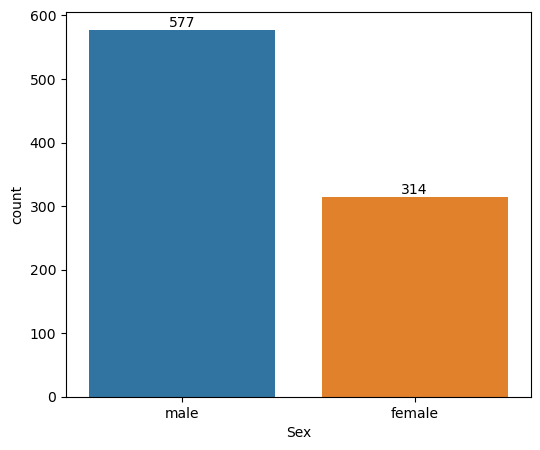

In [15]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x='Sex', data=data)
ax.bar_label(ax.containers[0]);

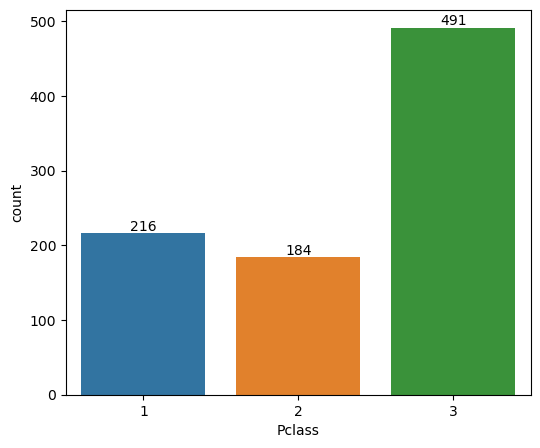

In [16]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x='Pclass', data=data)
ax.bar_label(ax.containers[0]);

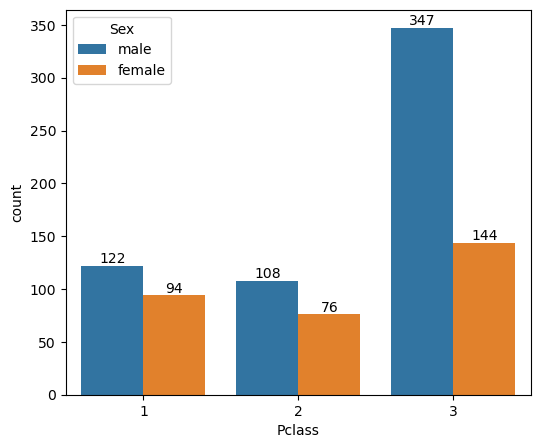

In [18]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x='Pclass', data=data, hue = 'Sex')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

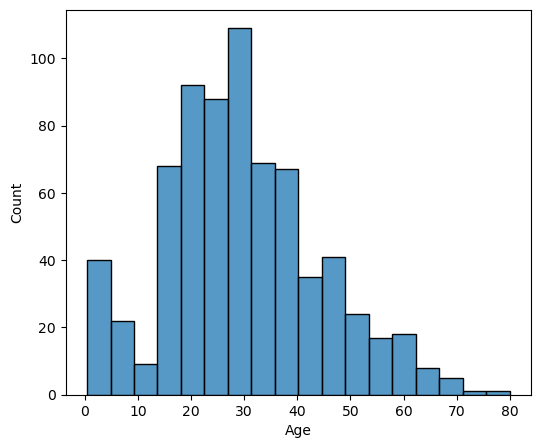

In [26]:
plt.figure(figsize = (6,5))
sns.histplot(data['Age'], bins = 18)
plt.show();

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Creating a new feature

In [30]:
data['isAccompanied'] = data['SibSp']+data['Parch']
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,isAccompanied
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,3,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0,0


In [31]:
data['isAccompanied'] = data['isAccompanied'].apply(lambda x: 1 if x > 0 else 0)
data.tail()

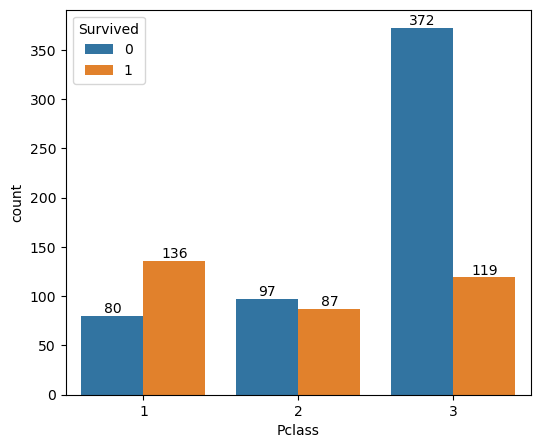

In [33]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x='Pclass', data=data, hue = 'Survived')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

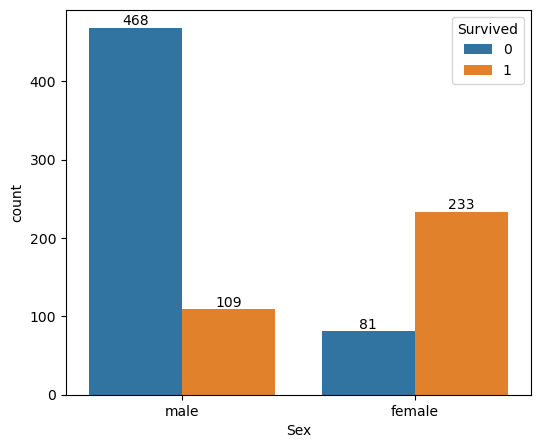

In [34]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x='Sex', data=data, hue = 'Survived')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Data Pre-processing

In [35]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Alone',
       'isAccompanied'],
      dtype='object')

In [37]:
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [38]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,isAccompanied
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


In [40]:
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,isAccompanied
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,0


In [41]:
data['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [39]:
nulls = data.isnull().sum()
nulls = nulls[nulls>0]
nulls

Age    177
dtype: int64

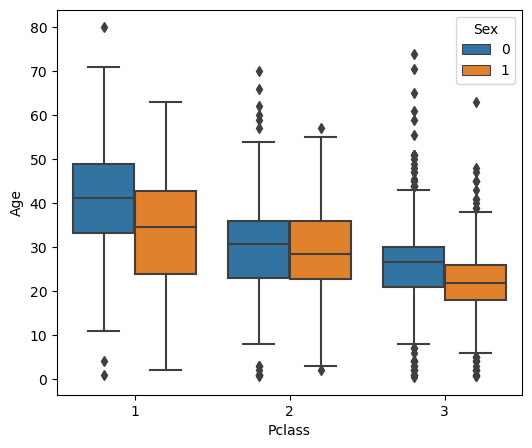

In [114]:
plt.figure(figsize = (6,5))
sns.boxplot(x='Pclass', y = 'Age', data=data, hue = 'Sex')
plt.show()

#### imputation of missing values in Age column

In [52]:
age_data = data[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean().reset_index()
age_data

,Pclass,Sex,Age
0,1,0,41.281386
1,1,1,34.611765
2,2,0,30.740707
3,2,1,28.722973
4,3,0,26.507589
5,3,1,21.750000


In [77]:
age_data

,Pclass,Sex,Age
0,1,0,41.281386
1,1,1,34.611765
2,2,0,30.740707
3,2,1,28.722973
4,3,0,26.507589
5,3,1,21.750000


In [101]:
def age_imputer(row):
    pclass = row['Pclass']
    sex = row['Sex']
    age = row['Age']
    
    if np.isnan(age):
        return age_data.loc[(age_data['Pclass'] == pclass) & (age_data['Sex'] == sex), 'Age'].values[0]
    else:
        return age

In [108]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,isAccompanied
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,0


In [102]:
age_imputer(data.iloc[1])

38.0

In [104]:
age_imputer(data.iloc[5])

26.507588932806325

In [110]:
data['Age'] = data[['Pclass', 'Sex', 'Age']].apply(age_imputer, axis = 1)

In [111]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,isAccompanied
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,0


In [112]:
nulls = data.isnull().sum()
nulls = nulls[nulls>0]
nulls

Series([], dtype: int64)

### Correlation analysis using Heatmap

In [115]:
# getting correlation of the data columns with each other

corr_data = data.corr().round(2)
corr_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,isAccompanied
Survived,1.00,-0.34,0.54,-0.07,-0.04,0.08,0.26,0.20
Pclass,-0.34,1.00,-0.13,-0.41,0.08,0.02,-0.55,-0.14
Sex,0.54,-0.13,1.00,-0.11,0.11,0.25,0.18,0.30
Age,-0.07,-0.41,-0.11,1.00,-0.25,-0.18,0.12,-0.18
SibSp,-0.04,0.08,0.11,-0.25,1.00,0.41,0.16,0.58
Parch,0.08,0.02,0.25,-0.18,0.41,1.00,0.22,0.58
Fare,0.26,-0.55,0.18,0.12,0.16,0.22,1.00,0.27
isAccompanied,0.20,-0.14,0.30,-0.18,0.58,0.58,0.27,1.00


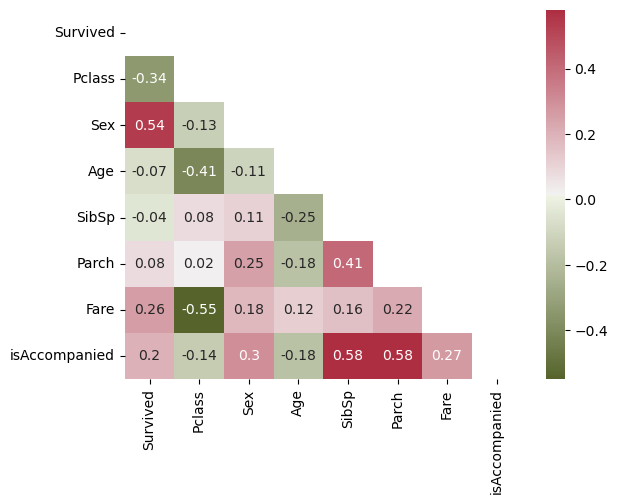

In [116]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(np.ones_like(corr_data))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

# using the upper triangle matrix as mask 
sns.heatmap(corr_data, annot=True, mask=matrix, cmap=cmap);

### Model Building